In [1]:
# -*- coding: utf-8 -*-
#DOWNLOAD THE DATASET

from keras.preprocessing.image import ImageDataGenerator

!pip install opendatasets

import opendatasets as op

op.download("https://www.kaggle.com/datasets/muhammadumer2002/rvl-cdip")




Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: mrunal623
Your Kaggle Key: ··········


100%|██████████| 11.7G/11.7G [01:53<00:00, 111MB/s]


In [ ]:
accuraciest=[]

In [2]:
accuracy=[]
recalls=[]
precision=[]

In [37]:
models=['VGG19','InceptionV3','VGG16']


In [ ]:
##DOWNLOAD THE DATASET

In [4]:
op.download("https://www.kaggle.com/datasets/pdavpoojan/the-rvlcdip-dataset-test")





Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: mrunal623
Your Kaggle Key: ··········


100%|██████████| 3.62G/3.62G [00:28<00:00, 136MB/s]


In [ ]:
#op.download("https://www.kaggle.com/datasets/muhammadumer2002/rvl-cdip")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: mrunal623
Your Kaggle Key: ··········


100%|██████████| 11.7G/11.7G [08:42<00:00, 24.2MB/s]


In [1]:
from keras.preprocessing.image import ImageDataGenerator

#!pip install opendatasets
datasetFolder = "rvl-cdip/train/"

datasetFolder1 = "rvl-cdip/val/"

datasetFolder2="the-rvlcdip-dataset-test/test/"
import opendatasets as op



import pathlib
import os
train = pathlib.Path(os.path.join(datasetFolder))
test=pathlib.Path(os.path.join(datasetFolder2))
val=pathlib.Path(os.path.join(datasetFolder1))

#print(train)

import pandas as pd
import numpy as np
import tensorflow as tf
import string
import nltk
import pathlib
import os
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.metrics import TruePositives, FalsePositives, TrueNegatives, FalseNegatives, BinaryAccuracy, Precision, Recall, AUC






from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
rescale = 1./255)
test_datagen = ImageDataGenerator(
rescale = 1./255)
cv_datagen = ImageDataGenerator(
rescale = 1./255)






from keras.optimizers import Adam

In [22]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
rescale = 1./255)
test_datagen = ImageDataGenerator()
cv_datagen = ImageDataGenerator()

test_it = test_datagen.flow_from_directory('rvl-cdip/val/',batch_size=32,target_size=(256, 256))
train_t = train_datagen.flow_from_directory('rvl-cdip/train/',batch_size=32,target_size=(256, 256),class_mode='categorical')


Found 5001 images belonging to 16 classes.
Found 124977 images belonging to 16 classes.


In [2]:
def get_images_labels(images, label):
  arr = []
  labels = []
  for i in images:
    img = cv2.imread(os.path.join(i))
    img = cv2.resize(img, (256, 256))
    arr.append(img)
    labels.append(label)
  return [arr, labels]

In [6]:
#Training Data
[form, Y_form] = get_images_labels(list(train.glob("form/*.*")), 0)
[invoice, Y_invoice] = get_images_labels(list(train.glob("invoice/*.*")), 1)
[letter, Y_letter] = get_images_labels(list(train.glob("letter/*.*")), 2)
[resume, Y_resume] = get_images_labels(list(train.glob("resume/*.*")), 3)

In [7]:
train_images = form + invoice + letter + resume
train_labels =  Y_form +Y_invoice+ Y_letter +Y_resume 

In [8]:
train_images = np.asarray(train_images)
train_labels = np.asarray(train_labels)

In [9]:
train_labels = to_categorical(train_labels)

In [11]:
#Testing data
[form, Y_form] = get_images_labels(list(val.glob("form/*.*")), 0)
[invoice, Y_invoice] = get_images_labels(list(val.glob("invoice/*.*")), 1)
[letter, Y_letter] = get_images_labels(list(val.glob("letter/*.*")), 2)
[resume, Y_resume] = get_images_labels(list(val.glob("resume/*.*")), 3)

In [12]:
test_images = form + invoice + letter +resume
test_labels =  Y_form +Y_invoice+ Y_letter +Y_resume 

In [13]:
test_images = np.asarray(test_images)
test_labels = np.asarray(test_labels)

In [ ]:
test_images.shape

(1270, 256, 256, 3)

In [14]:
test_labels = to_categorical(test_labels)

In [ ]:
train_images[0].shape

(256, 256, 3)

In [10]:
#Validation Data
[form, Y_form] = get_images_labels(list(test.glob("form/*.*")), 0)
[invoice, Y_invoice] = get_images_labels(list(test.glob("invoice/*.*")), 1)
[letter, Y_letter] = get_images_labels(list(test.glob("letter/*.*")), 2)
[resume, Y_resume] = get_images_labels(list(test.glob("resume/*.*")), 3)

In [11]:
val_images = form + invoice + letter +resume
val_labels =  Y_form +Y_invoice+ Y_letter +Y_resume 

In [12]:
val_images = np.asarray(val_images)
val_labels = np.asarray(val_labels)
val_labels = to_categorical(val_labels)

In [ ]:
#FINE TUNING THE PRE TRAINED MODELS

In [3]:


from keras.optimizers import Adam
from keras import applications
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential, Model 
from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D
from keras import backend as k 
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping
import keras
img_width, img_height = 256,256
batch_size = 32
epochs = 50

#model = tf.keras.applications.VGG19(weights = "imagenet", include_top=False, input_shape = (img_width, img_height, 3),)
model = tf.keras.applications.inception_v3.InceptionV3(weights = "imagenet", include_top=False, input_shape = (img_width, img_height, 3),)

from keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=2, min_lr=0.000001)
mcp_save = ModelCheckpoint('model_3.hdf5', save_best_only=True, monitor='acc', mode='max')

from keras.layers import GlobalAveragePooling2D

for layer in model.layers:
  layer.trainable=True

#Adding custom Layers 

x = model.output

x = Flatten()(x)
x = Dense(512, activation="relu")(x)
x = Dropout(0.5)(x)
x = Dense(256, activation="relu")(x)
x = Dropout(0.5)(x)
x = Dense(128, activation="relu")(x)
predictions = Dense(4, activation="softmax")(x)

# creating the final model 
model_final = Model(inputs = model.input, outputs = predictions)

# compile the model 
model_final.compile(loss = "categorical_crossentropy", optimizer =Adam(lr=0.0001), metrics=["accuracy"])

model_final.summary()

history=model_final.fit(
train_images,train_labels,steps_per_epoch =12497/32, epochs=25,validation_data=(val_images,val_labels), validation_steps=9983/32,
callbacks=[reduce_lr,mcp_save])




87910968/87910968 [==============================] - 4s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 127, 127, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 127, 127, 32  96         ['conv2d[0][0]']                 
 alization)                  

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


 ormalization)                                                                                    
                                                                                                  
 activation_15 (Activation)     (None, 29, 29, 64)   0           ['batch_normalization_15[0][0]'] 
                                                                                                  
 conv2d_13 (Conv2D)             (None, 29, 29, 48)   12288       ['mixed0[0][0]']                 
                                                                                                  
 conv2d_16 (Conv2D)             (None, 29, 29, 96)   55296       ['activation_15[0][0]']          
                                                                                                  
 batch_normalization_13 (BatchN  (None, 29, 29, 48)  144         ['conv2d_13[0][0]']              
 ormalization)                                                                                    
          

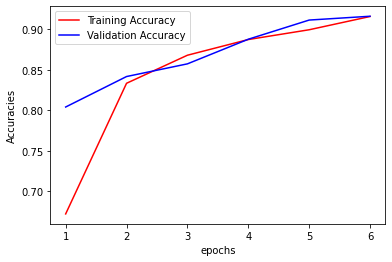

In [ ]:

from tensorflow import keras

def plt_dynamic(x,ty,colors=['b']):
    ax.plot(x, ty, 'r', label="Training Accuracy")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

def plt_dynamics(x,ty,colors=['b']):
    ax.plot(x, ty, 'b', label="Validation Accuracy")
    plt.legend()
    plt.grid()
    fig.canvas.draw()


fig,ax = plt.subplots(1,1)
ax.set_xlabel('epochs') ; ax.set_ylabel('Accuracies')    
# list of epoch numbers
x = list(range(1,6+1))

ty = history.history['accuracy']
ty1=history.history['val_accuracy']
plt_dynamic(x,ty)
plt_dynamics(x,ty1)






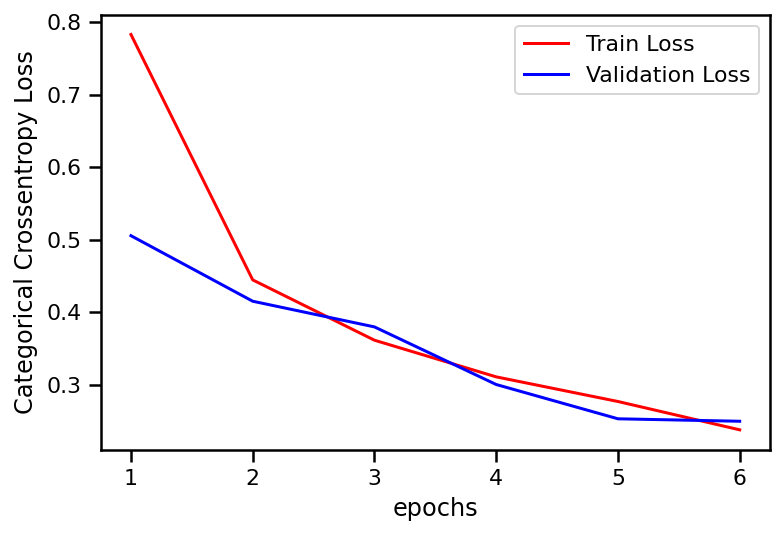

In [ ]:
import seaborn as sns

def plt_dynamic(x,ty,colors=['b']):
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

def plt_dynamics(x,ty,colors=['b']):
    ax.plot(x, ty, 'b', label="Validation Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

%matplotlib inline
sns.set_context('notebook')
%config InlineBackend.figure_format = 'retina'


fig,ax = plt.subplots(1,1)
ax.set_xlabel('epochs') ; ax.set_ylabel('Categorical Crossentropy Loss')    
# list of epoch numbers
x = list(range(1,6+1))

ty = history.history['loss']
ty1=history.history['val_loss']
plt_dynamic(x,ty)
plt_dynamics(x,ty1)

In [ ]:
from keras.optimizers import Adam
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential, Model 
from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D
from keras import backend as k 
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping
import keras
img_width, img_height = 256,256
batch_size = 32
epochs = 50

#model = tf.keras.applications.VGG19(weights = "imagenet", include_top=False, input_shape = (img_width, img_height, 3),)
model = tf.keras.applications.resnet_v2.ResNet50V2(weights = "imagenet", include_top=False, input_shape = (img_width, img_height, 3),)

from keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=2, min_lr=0.000001)
mcp_save = ModelCheckpoint('model_3.hdf5', save_best_only=True, monitor='acc', mode='max')

from keras.layers import GlobalAveragePooling2D

for layer in model.layers:
  layer.trainable=True

#Adding custom Layers 

x = model.output

x = Flatten()(x)
x = Dense(256, activation="relu")(x)
x = Dropout(0.5)(x)
x = Dense(128, activation="relu")(x)
predictions = Dense(4, activation="softmax")(x)

# creating the final model 
model_final1 = Model(inputs = model.input, outputs = predictions)

# compile the model 
model_final1.compile(loss = "categorical_crossentropy", optimizer =Adam(lr=0.0001), metrics=["accuracy"])

model_final1.summary()

history=model_final1.fit(
train_images,train_labels,steps_per_epoch =31172/32, epochs=6,validation_data=(val_images,val_labels), validation_steps=9983/32,
callbacks=[reduce_lr,mcp_save])



In [ ]:

from tensorflow import keras

def plt_dynamic(x,ty,colors=['b']):
    ax.plot(x, ty, 'r', label="Training Accuracy")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

def plt_dynamics(x,ty,colors=['b']):
    ax.plot(x, ty, 'b', label="Validation Accuracy")
    plt.legend()
    plt.grid()
    fig.canvas.draw()


fig,ax = plt.subplots(1,1)
ax.set_xlabel('epochs') ; ax.set_ylabel('Accuracies')    
# list of epoch numbers
x = list(range(1,6+1))

ty = history.history['accuracy']
ty1=history.history['val_accuracy']
plt_dynamic(x,ty)
plt_dynamics(x,ty1)






In [ ]:
import seaborn as sns

def plt_dynamic(x,ty,colors=['b']):
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

def plt_dynamics(x,ty,colors=['b']):
    ax.plot(x, ty, 'b', label="Validation Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

%matplotlib inline
sns.set_context('notebook')
%config InlineBackend.figure_format = 'retina'


fig,ax = plt.subplots(1,1)
ax.set_xlabel('epochs') ; ax.set_ylabel('Categorical Crossentropy Loss')    
# list of epoch numbers
x = list(range(1,6+1))

ty = history.history['loss']
ty1=history.history['val_loss']
plt_dynamic(x,ty)
plt_dynamics(x,ty1)

In [ ]:
from keras.optimizers import Adam
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential, Model 
from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D
from keras import backend as k 
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping
import keras
img_width, img_height = 256,256
batch_size = 32
epochs = 50

model = tf.keras.applications.VGG16(weights = "imagenet", include_top=False, input_shape = (img_width, img_height, 3),)
#model = tf.keras.applications.resnet_v2.ResNet50V2(weights = "imagenet", include_top=False, input_shape = (img_width, img_height, 3),)

from keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=2, min_lr=0.000001)
mcp_save = ModelCheckpoint('model_3.hdf5', save_best_only=True, monitor='acc', mode='max')

from keras.layers import GlobalAveragePooling2D

for layer in model.layers:
  layer.trainable=True

#Adding custom Layers 

x = model.output

x = Flatten()(x)
x = Dense(256, activation="relu")(x)
x = Dropout(0.5)(x)
x = Dense(128, activation="relu")(x)
predictions = Dense(4, activation="softmax")(x)

# creating the final model 
model_final2 = Model(inputs = model.input, outputs = predictions)

# compile the model 
model_final2.compile(loss = "categorical_crossentropy", optimizer =Adam(lr=0.0001), metrics=["accuracy"])

model_final2.summary()

history=model_final1.fit(
train_images,train_labels,steps_per_epoch =31172/32, epochs=15,validation_data=(val_images,val_labels), validation_steps=9983/32,
callbacks=[reduce_lr,mcp_save])



In [ ]:

from tensorflow import keras

def plt_dynamic(x,ty,colors=['b']):
    ax.plot(x, ty, 'r', label="Training Accuracy")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

def plt_dynamics(x,ty,colors=['b']):
    ax.plot(x, ty, 'b', label="Validation Accuracy")
    plt.legend()
    plt.grid()
    fig.canvas.draw()


fig,ax = plt.subplots(1,1)
ax.set_xlabel('epochs') ; ax.set_ylabel('Accuracies')    
# list of epoch numbers
x = list(range(1,6+1))

ty = history.history['accuracy']
ty1=history.history['val_accuracy']
plt_dynamic(x,ty)
plt_dynamics(x,ty1)






In [ ]:
import seaborn as sns

def plt_dynamic(x,ty,colors=['b']):
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

def plt_dynamics(x,ty,colors=['b']):
    ax.plot(x, ty, 'b', label="Validation Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

%matplotlib inline
sns.set_context('notebook')
%config InlineBackend.figure_format = 'retina'


fig,ax = plt.subplots(1,1)
ax.set_xlabel('epochs') ; ax.set_ylabel('Categorical Crossentropy Loss')    
# list of epoch numbers
x = list(range(1,6+1))

ty = history.history['loss']
ty1=history.history['val_loss']
plt_dynamic(x,ty)
plt_dynamics(x,ty1)

In [ ]:
models=['VGG19','InceptionV3','VGG16','ResNet50']

In [ ]:
from tensorflow import keras
model_final.save('model_VGG19new.h5')


In [ ]:
from tensorflow import keras
model_final1.save('model_resnet50.h5')

In [ ]:
from tensorflow import keras
model_final2.save('model_vgg16.h5')

In [ ]:
m = keras.models.load_model('model_VGG19new.h5')

In [ ]:
m1= keras.models.load_model('model_resnet50.h5')

In [ ]:
m2= keras.models.load_model('model_vgg16.h5')

In [ ]:

score=model_final.evaluate(test_images,test_labels,batch_size=32,workers=1, use_multiprocessing=True, verbose=0)
accuraciest.append(score)
#print(score)
print("The accuracy for model-Pretrained VGG 19 initiazlied with image net:",score[1]*100,"%")


The accuracy for model-Pretrained VGG 19 initiazlied with image net: 90.31496047973633 %


In [ ]:
score=model_final1.evaluate(test_images,test_labels,batch_size=32,workers=1, use_multiprocessing=True, verbose=0)
accuraciest.append(score)
#print(score)
print("The accuracy for model-Pretrained resnet50 initiazlied with image net:",score[1]*100,"%")

In [ ]:
score=model_final2.evaluate(test_images,test_labels,batch_size=32,workers=1, use_multiprocessing=True, verbose=0)
accuraciest.append(score)
#print(score)
print("The accuracy for model-Pretrained vgg16 initiazlied with image net:",score[1]*100,"%")

(512, 512, 3)


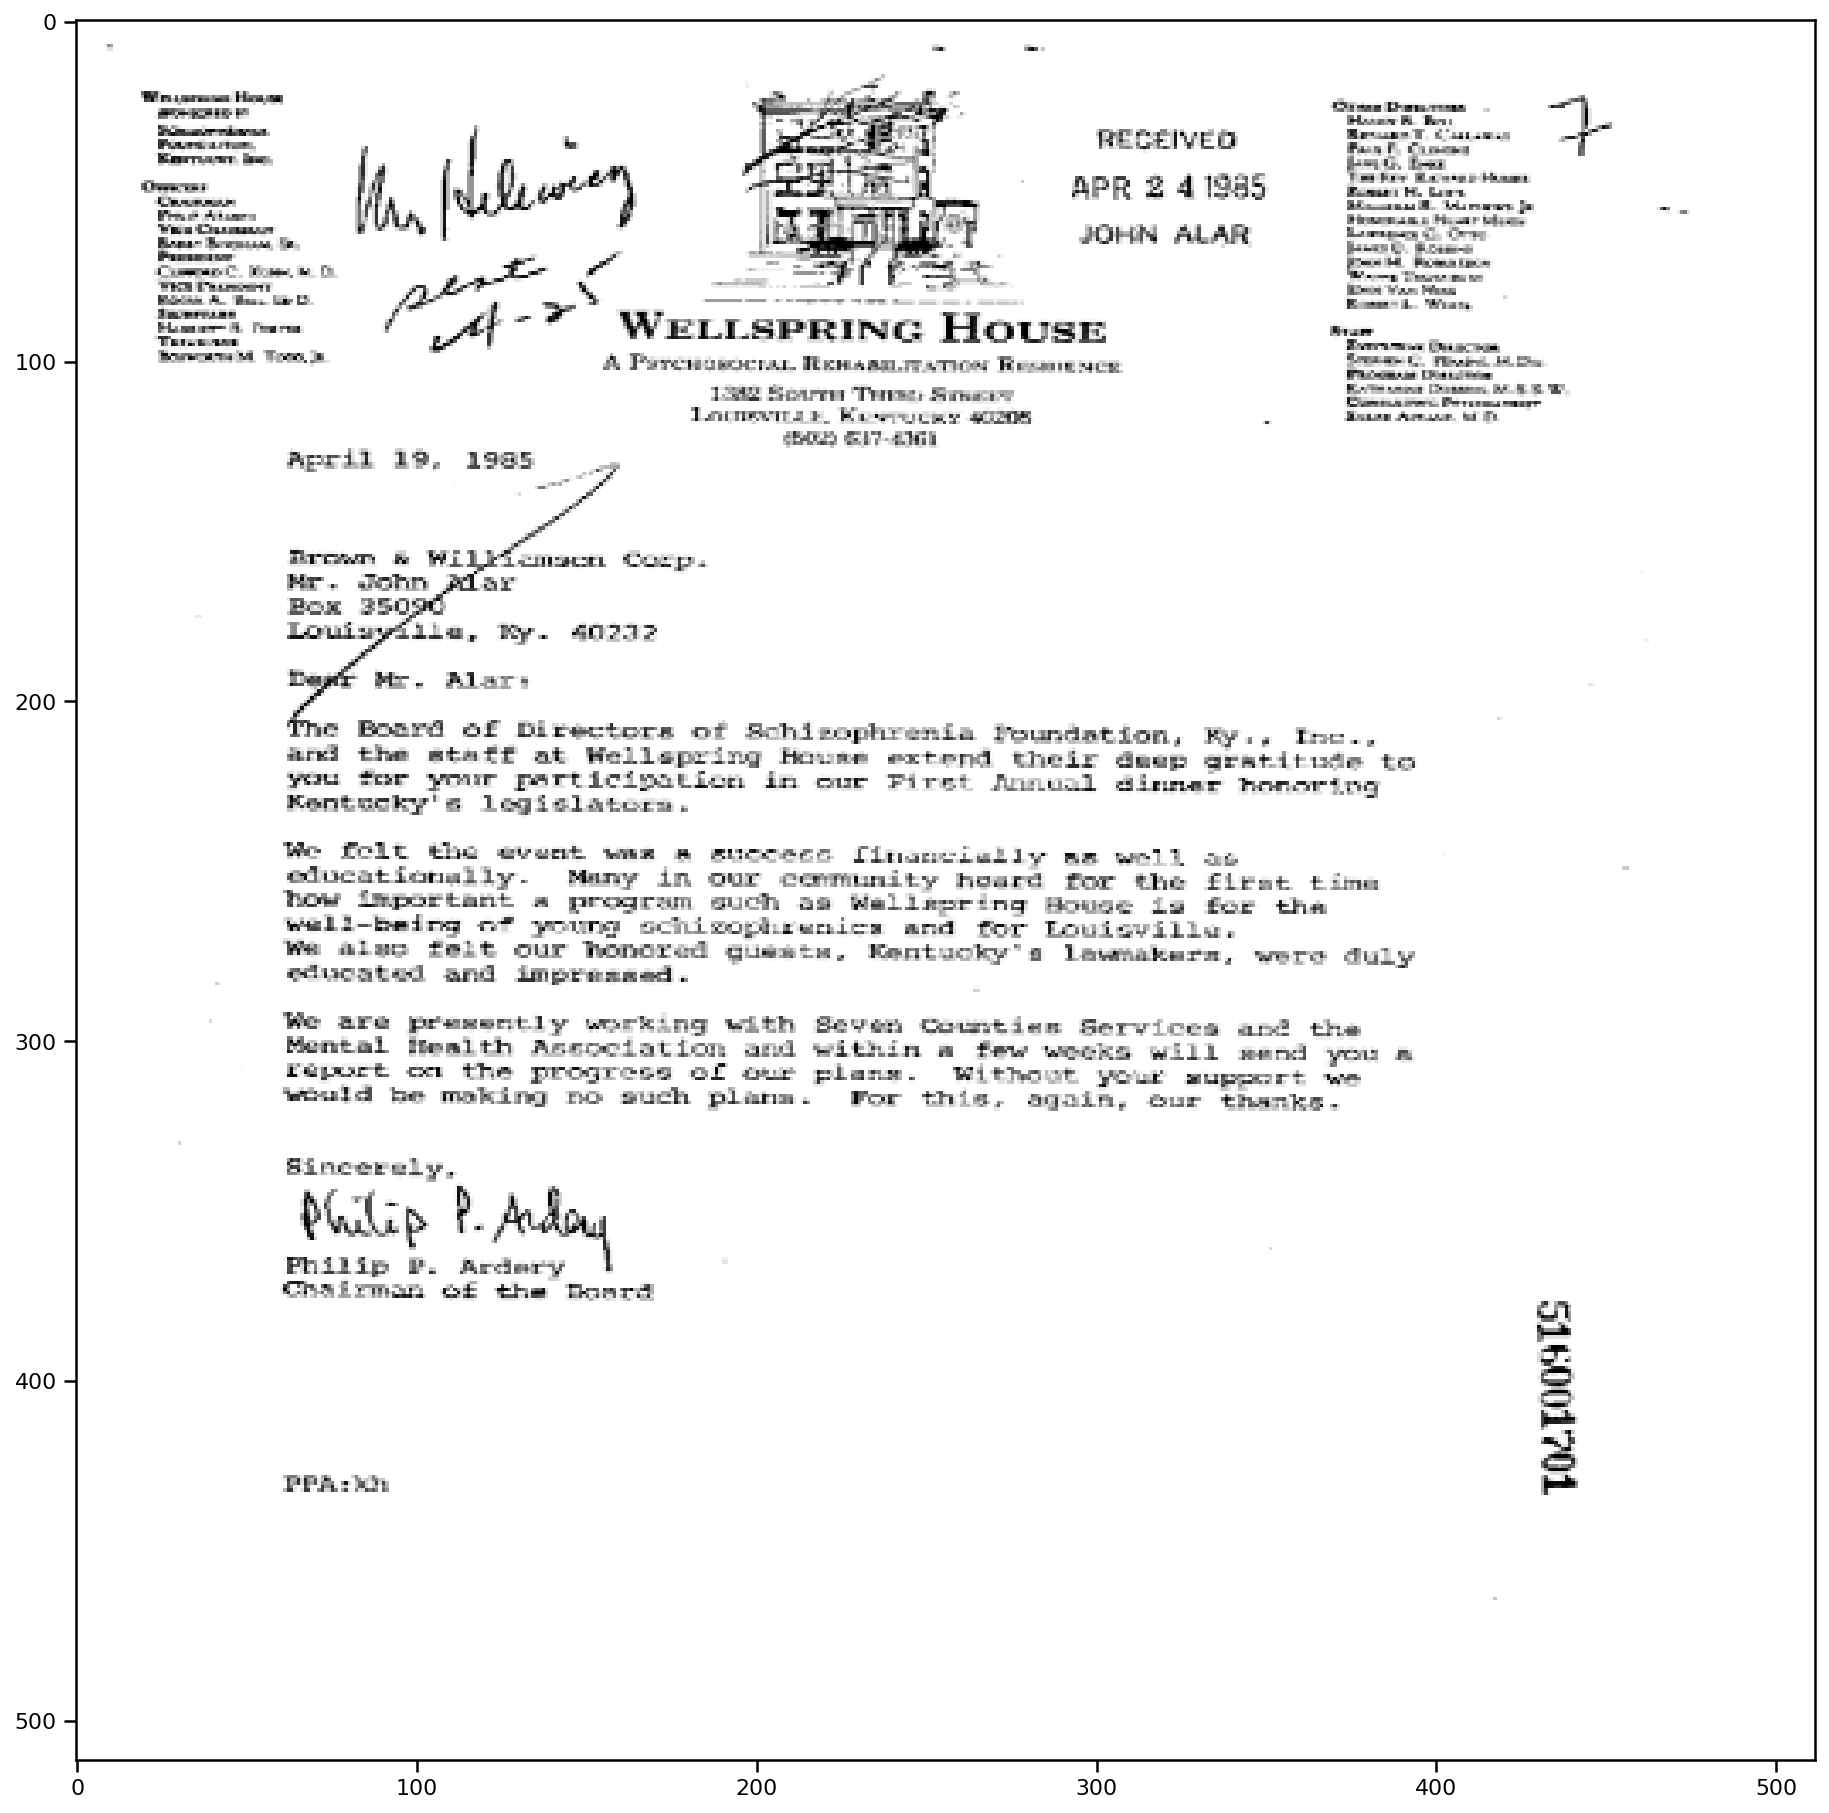

40/40 [==============================] - 9s 225ms/step
Accuracy Score is 0.9031496062992126
0.9031496062992126
0.904324159334664
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       329
           1       0.90      0.84      0.87       303
           2       0.93      0.89      0.91       317
           3       0.94      0.97      0.96       321

    accuracy                           0.90      1270
   macro avg       0.90      0.90      0.90      1270
weighted avg       0.90      0.90      0.90      1270

tf.Tensor([329 303 317 321], shape=(4,), dtype=int32)


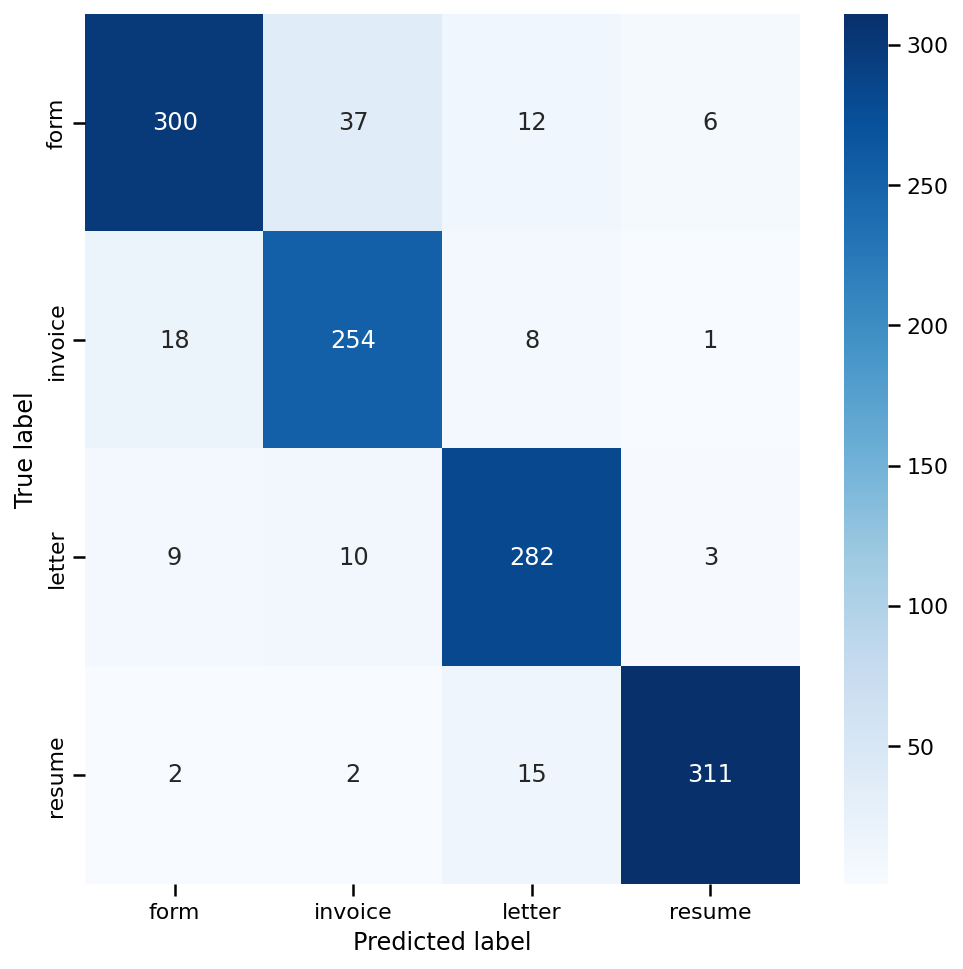

1/1 [==============================] - 0s 16ms/step
letter


In [ ]:
#Prediction on test data
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
plt.figure(figsize =(16, 16))
img_path = "test_letter.tif"
img = cv2.imread(img_path)
#img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
img = cv2.resize(img, (512, 512))
print(img.shape)
plt.imshow(img)
plt.show()
from sklearn import metrics
import numpy as np
import seaborn as sn



#Predictions on Test images passed as batch
Y_pred = m.predict(test_images)      
val_preds = np.argmax(Y_pred, axis=1)
y_test = np.argmax(test_labels, axis = 1)

from sklearn.metrics import accuracy_score,recall_score, precision_score,classification_report
print('Accuracy Score is',accuracy_score(y_test, val_preds))
accuracy.append(accuracy_score(y_test, val_preds))
print(recall_score(y_test, val_preds, average='weighted'))
print( precision_score(y_test, val_preds, average='weighted'))
recalls.append(recall_score(y_test, val_preds, average='weighted'))
precision.append( precision_score(y_test, val_preds, average='weighted'))
print(classification_report(y_test, val_preds))
#zipped = list(zip(models, accuracy, recalls,precision))
#df = pd.DataFrame(zipped, columns=['Models', 'Testing Accuracies', 'Recalls','Precision'])
#c=pd.DataFrame()

classes = list(range(4))
class_names=['form','invoice','letter','resume']
j=tf.math.confusion_matrix(val_preds,y_test)
tot=sum(j)
print(tot)
res = tf.math.confusion_matrix(val_preds,y_test).numpy()
cm = pd.DataFrame(res,
                     index = classes, 
                     columns = classes)

import seaborn as sns
figure = plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True,fmt="d",  xticklabels=class_names, yticklabels=class_names, cmap=plt.cm.Blues)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
     
    
          

'''count=0
for i in range(len(val_trues)):
  if(val_preds[i] == val_trues[i]):
    print("The predicted class is : " , val_preds[i])
    print("The real class is : " , val_trues[i])
    count=count+1'''



#print('Accuracy score : %.3f' % metrics.accuracy_score(val_trues, val_preds))
#from sklearn.metrics import classification_report
#print(classification_report(val_trues, val_preds))


#Prediction on single image
import tensorflow
import keras
from keras.applications.vgg19 import preprocess_input, decode_predictions
img =image.load_img(img_path, target_size=(256, 256))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
preds=m.predict(x)
# create a list containing the class labels
class_labels = ['form','invoice','letter','resume']
# find the index of the class with maximum score
pred = np.argmax(preds, axis=-1)
# print the label of the class with maximum score
print(class_labels[pred[0]])


#confusion_mtx = [val_trues, val_preds]
#print(confusion_mtx)
#img = tf.keras.utils.load_img('test_invoice.tif', target_size=(256, 256))
#print(img.shape)
#img_array = tf.keras.utils.img_to_array(img)

#prediction = model_final.predict(img_array)
#print("predicted label for test image",np.argmax(prediction,axis=1))


In [ ]:
#Prediction on test data
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
plt.figure(figsize =(16, 16))
img_path = "test_letter.tif"
img = cv2.imread(img_path)
#img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#img = cv2.resize(img, (256, 256))
print(img.shape)
plt.imshow(img)
plt.show()
from sklearn import metrics
import numpy as np
import seaborn as sn



#Predictions on Test images passed as batch
Y_pred = m1.predict(test_images)      
val_preds = np.argmax(Y_pred, axis=1)
y_test = np.argmax(test_labels, axis = 1)

from sklearn.metrics import accuracy_score,recall_score, precision_score,classification_report
print('Accuracy Score is',accuracy_score(y_test, val_preds))
accuracy.append(accuracy_score(y_test, val_preds))
print(recall_score(y_test, val_preds, average='weighted'))
print( precision_score(y_test, val_preds, average='weighted'))
recalls.append(recall_score(y_test, val_preds, average='weighted'))
precision.append( precision_score(y_test, val_preds, average='weighted'))
print(classification_report(y_test, val_preds))
#zipped = list(zip(models, accuracy, recalls,precision))
#df = pd.DataFrame(zipped, columns=['Models', 'Testing Accuracies', 'Recalls','Precision'])
#c=pd.DataFrame()

classes = list(range(4))
class_names=['form','invoice','letter','resume']
j=tf.math.confusion_matrix(val_preds,y_test)
tot=sum(j)
print(tot)
res = tf.math.confusion_matrix(val_preds,y_test).numpy()
cm = pd.DataFrame(res,
                     index = classes, 
                     columns = classes)

import seaborn as sns
figure = plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True,fmt="d",  xticklabels=class_names, yticklabels=class_names, cmap=plt.cm.Blues)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
     
    
          

'''count=0
for i in range(len(val_trues)):
  if(val_preds[i] == val_trues[i]):
    print("The predicted class is : " , val_preds[i])
    print("The real class is : " , val_trues[i])
    count=count+1'''



#print('Accuracy score : %.3f' % metrics.accuracy_score(val_trues, val_preds))
#from sklearn.metrics import classification_report
#print(classification_report(val_trues, val_preds))


#Prediction on single image
import tensorflow
import keras
from keras.applications.vgg19 import preprocess_input, decode_predictions
img =image.load_img(img_path, target_size=(256, 256))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
preds=m.predict(x)
# create a list containing the class labels
class_labels = ['form','invoice','letter','resume']
# find the index of the class with maximum score
pred = np.argmax(preds, axis=-1)
# print the label of the class with maximum score
print(class_labels[pred[0]])


#confusion_mtx = [val_trues, val_preds]
#print(confusion_mtx)
#img = tf.keras.utils.load_img('test_invoice.tif', target_size=(256, 256))
#print(img.shape)
#img_array = tf.keras.utils.img_to_array(img)

#prediction = model_final.predict(img_array)
#print("predicted label for test image",np.argmax(prediction,axis=1))


In [ ]:
#Prediction on test data
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
plt.figure(figsize =(16, 16))
img_path = "test_letter.tif"
img = cv2.imread(img_path)
#img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#img = cv2.resize(img, (256, 256))
print(img.shape)
plt.imshow(img)
plt.show()
from sklearn import metrics
import numpy as np
import seaborn as sn



#Predictions on Test images passed as batch
Y_pred = m2.predict(test_images)      
val_preds = np.argmax(Y_pred, axis=1)
y_test = np.argmax(test_labels, axis = 1)

from sklearn.metrics import accuracy_score,recall_score, precision_score,classification_report
print('Accuracy Score is',accuracy_score(y_test, val_preds))
accuracy.append(accuracy_score(y_test, val_preds))
print(recall_score(y_test, val_preds, average='weighted'))
print( precision_score(y_test, val_preds, average='weighted'))
recalls.append(recall_score(y_test, val_preds, average='weighted'))
precision.append( precision_score(y_test, val_preds, average='weighted'))
print(classification_report(y_test, val_preds))
#zipped = list(zip(models, accuracy, recalls,precision))
#df = pd.DataFrame(zipped, columns=['Models', 'Testing Accuracies', 'Recalls','Precision'])
#c=pd.DataFrame()

classes = list(range(4))
class_names=['form','invoice','letter','resume']
j=tf.math.confusion_matrix(val_preds,y_test)
tot=sum(j)
print(tot)
res = tf.math.confusion_matrix(val_preds,y_test).numpy()
cm = pd.DataFrame(res,
                     index = classes, 
                     columns = classes)

import seaborn as sns
figure = plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True,fmt="d",  xticklabels=class_names, yticklabels=class_names, cmap=plt.cm.Blues)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
     
    
          

'''count=0
for i in range(len(val_trues)):
  if(val_preds[i] == val_trues[i]):
    print("The predicted class is : " , val_preds[i])
    print("The real class is : " , val_trues[i])
    count=count+1'''



#print('Accuracy score : %.3f' % metrics.accuracy_score(val_trues, val_preds))
#from sklearn.metrics import classification_report
#print(classification_report(val_trues, val_preds))


#Prediction on single image
import tensorflow
import keras
from keras.applications.vgg19 import preprocess_input, decode_predictions
img =image.load_img(img_path, target_size=(256, 256))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
preds=m.predict(x)
# create a list containing the class labels
class_labels = ['form','invoice','letter','resume']
# find the index of the class with maximum score
pred = np.argmax(preds, axis=-1)
# print the label of the class with maximum score
print(class_labels[pred[0]])



In [36]:
accuracy=[0.9432,0.9032,0.8832]
recalls=[0.9356,0.90110,0.8889]
precision=[0.9034,0.890,0.8960]

In [38]:
import pandas as pd
zipped = list(zip(models, accuracy, recalls,precision))
df = pd.DataFrame(zipped, columns=['Models', 'Testing Accuracies', 'Recall','Precision'])
df1=df.sort_values(by=['Testing Accuracies'],ascending=False,ignore_index=True)

In [39]:
df1

,Models,Testing Accuracies,Recall,Precision
0,VGG19,0.9432,0.9356,0.9034
1,InceptionV3,0.9032,0.9011,0.8900
2,VGG16,0.8832,0.8889,0.8960


# New Section